# Identification of a Model

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from simmit import smartplus as sim
from simmit import identify as iden
import os

dir = os.path.dirname(os.path.realpath('__file__'))

In this Python Notebook we will show how to properly run a simulation of a composite material, providing the ODF (orientation density function) of the reinforcments.

Such identification procedure require:
1. Proper ODF peak data
1. Proper composite properties
2. A proper numerical model (here a composite model for laminate constitutive model)

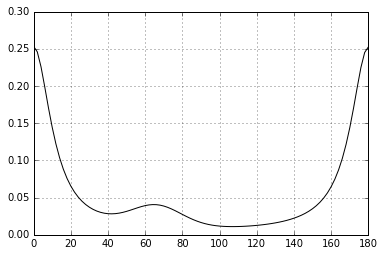

In [10]:
x = np.arange(0,182,2)
path_data = dir + '/data/'
peak_file = 'Npeaks0.dat'

y = sim.get_densities(x, path_data, peak_file, False)
fig = plt.figure()

plt.grid(True)
plt.plot(x,y, c='black')

In [4]:
umat_name = 'MIMTN' #This is the 5 character code for the Mori-Tanaka homogenization for composites with a matrix and ellipsoidal reinforcments
nstatev = 0

rho = 1.12 #The density of the material (overall)
c_p = 1.64 #The specific heat capacity (overall)

nphases = 2 #The number of phases
num_file = 0 #The num of the file that contains the subphases
int1 = 20 
int2 = 20

psi_rve = 0.
theta_rve = 0.
phi_rve = 0.

props = np.array([nphases, num_file, int1, int2])

path_data = 'data'
path_results = 'results'
Nfile_init = 'Nellipsoids0.dat'
Nfile_disc = 'Nellipsoids1.dat'

nphases_rve = 36
num_phase_disc = 1

sim.ODF_discretization(nphases_rve, num_phase_disc, 0., 180., umat_name, props, path_data, peak_file, Nfile_init, Nfile_disc, 1)


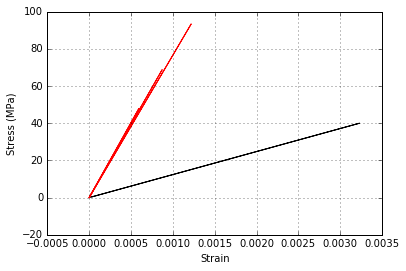

In [20]:
#Run the simulation
pathfile = 'path.txt'
nphases = 37 #The number of phases
num_file = 1 #The num of the file that contains the subphases
props = np.array([nphases, num_file, int1, int2])
outputfile = 'results_MTN.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, rho, c_p, path_data, path_results, pathfile, outputfile)


fig = plt.figure()
outputfile_macro =  dir + '/' + path_results + '/results_MTN_global-0.txt'
e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_macro, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
plt.grid(True)
plt.plot(e11,s11, c='black')

for i in range(8,12):
    outputfile_micro =  dir + '/' + path_results + '/results_MTN_global-0-' + str(i) + '.txt'
    e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_micro, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
    plt.grid(True)
    plt.plot(e11,s11, c='red')

plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')


plt.show()